In [3]:
# Pandas/Data readers/ etc 
import pandas as pd
import numpy as np
import pickle

# Visuals 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Stats Models
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots

# PMDARIMA
import pmdarima
from pmdarima import auto_arima    # for determining ARIMA orders

# Facebook Prophet 
from fbprophet import Prophet

# Metrics
from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings("ignore")

# Styling Guide 
plt.style.use('fivethirtyeight')
sns.set_palette(sns.diverging_palette(250,700, s= 70 , l= 10, n= 12))

## Facebook Prophet Chiangping

In [49]:
trainChiangping = pd.read_pickle('PKL/TRAIN/trainChangping.pkl')
Chiangping = pd.read_pickle('PKL/TEST/Changping.pkl')

# Resampled 
trainChiangping = trainChiangping.resample('D').mean()
Chiangping = Chiangping.resample('D').mean()

In [50]:
trainChiangping.reset_index(inplace = True)
Chiangping.reset_index(inplace = True)



In [109]:
Chiangping.head()

,ds,y
0,2016-03-26,7.500000
1,2016-03-27,12.520833
2,2016-03-28,37.958333
3,2016-03-29,12.166667
4,2016-03-30,20.666667


In [51]:
trainChiangping.rename(columns={"Date": "ds", "PM2.5": "y"}, inplace = True)
Chiangping.rename(columns={"Date": "ds", "PM2.5": "y"}, inplace = True)

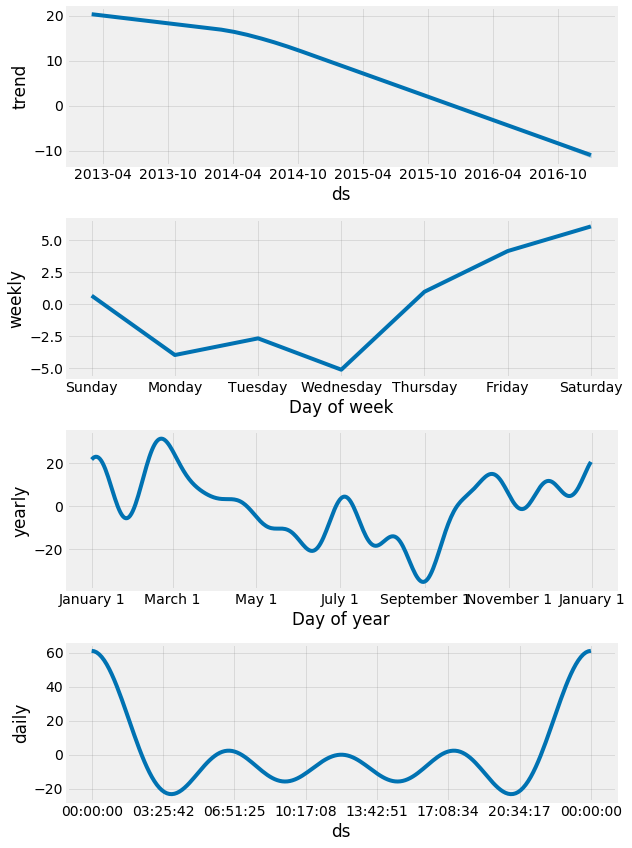

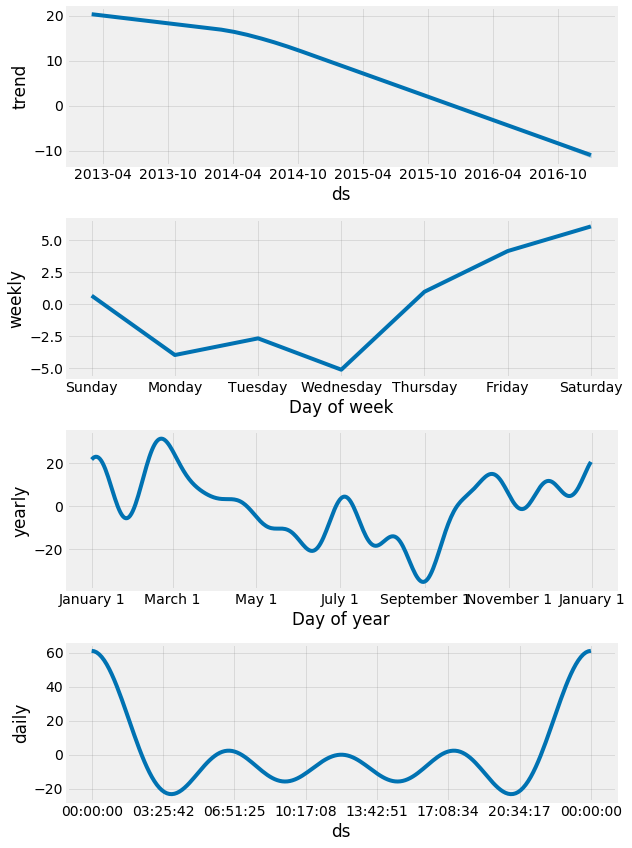

In [110]:
# Attempt at FaceBook Prophet 

m = Prophet(daily_seasonality = True)
m.fit(trainChiangping)  

future = m.make_future_dataframe(periods=281, freq = 'D')

bam = m.predict(future)
m.plot_components(bam)


In [108]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(Chiangping.y, future)
print(f'Prophet MSE Error: {error:18}')

from statsmodels.tools.eval_measures import rmse
error = rmse(Chiangping.y, future)
print(f'Prophet RMSE Error: {error:18}')

ValueError: Found input variables with inconsistent numbers of samples: [281, 1403]

In [ ]:
Chiangping.shape

In [103]:
future.shape

(1404, 1)

In [ ]:
# Attempt at FaceBook Prophet 

fbprophet = Prophet(daily_seasonality = True)
fbprophet.fit(trainChiangping)  
future = fbprophet.make_future_dataframe(periods=365)
bam = fbprophet.predict(future)
fbprophet.plot_components(bam)

In [75]:
bam.yhat

0       111.127294
1       111.888006
2       105.264940
3        99.402361
4        99.491010
           ...    
1482     49.748223
1483     55.388305
1484     58.135802
1485     59.651824
1486     53.840972
Name: yhat, Length: 1487, dtype: float64

In [96]:
Chiangping.shape

(281, 2)